In [1]:
import os
import pandas as pd
import imageio
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
PATH_ALGO_1 = 'Dataset/sample_1/'
PATH_ALGO_2 = 'Dataset/sample_2/'
PATH_ALGO_3 = 'Dataset/sample_3/'
PATH_EXPERT = 'Dataset/Expert/'
PATH_ORIGIN = 'Dataset/Origin/'
PATH_LABELS = 'Dataset/OpenPart.csv'

answers = pd.read_csv(PATH_LABELS)

In [3]:
img_ids = [s.split(sep='.')[0] for s in os.listdir(PATH_ORIGIN)]

def get_img_name(s, postfix):
    """
    postfix = s1/s2/s3/expert
    """
    return s + '_' + postfix + '.png'

In [4]:
def plot_img(img_id):
    path_1 = PATH_ALGO_1 + get_img_name(img_id, 's1')
    path_2 = PATH_ALGO_2 + get_img_name(img_id, 's2')
    path_3 = PATH_ALGO_3 + get_img_name(img_id, 's3')
    path_4 = PATH_EXPERT + get_img_name(img_id, 'expert')
    score_1, score_2, score_3 = answers[answers['Case'] == img_id+'.png'].values[0,1:]
    
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
    fig.suptitle(img_id)
    axs[0][0].imshow(imageio.imread(path_1), cmap='gray')
    axs[0][0].set_title(f'algo 1\nscore:{score_1}')
    axs[0][0].axis('off')
    axs[1][0].imshow(imageio.imread(path_2), cmap='gray')
    axs[1][0].set_title(f'algo 2\nscore:{score_2}')
    axs[1][0].axis('off')
    axs[0][1].imshow(imageio.imread(path_3), cmap='gray')
    axs[0][1].set_title(f'algo 3\nscore:{score_3}')
    axs[0][1].axis('off')
    axs[1][1].imshow(imageio.imread(path_4), cmap='gray')
    axs[1][1].set_title('expert')
    axs[1][1].axis('off')
    fig.show()

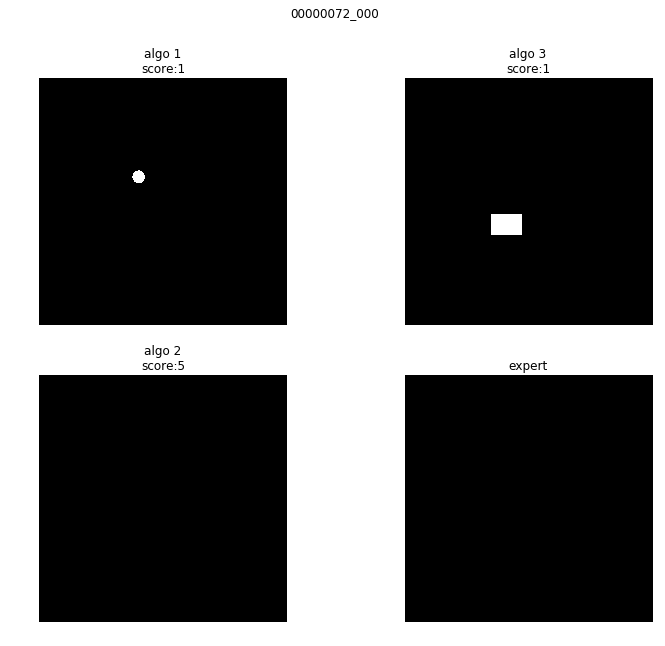

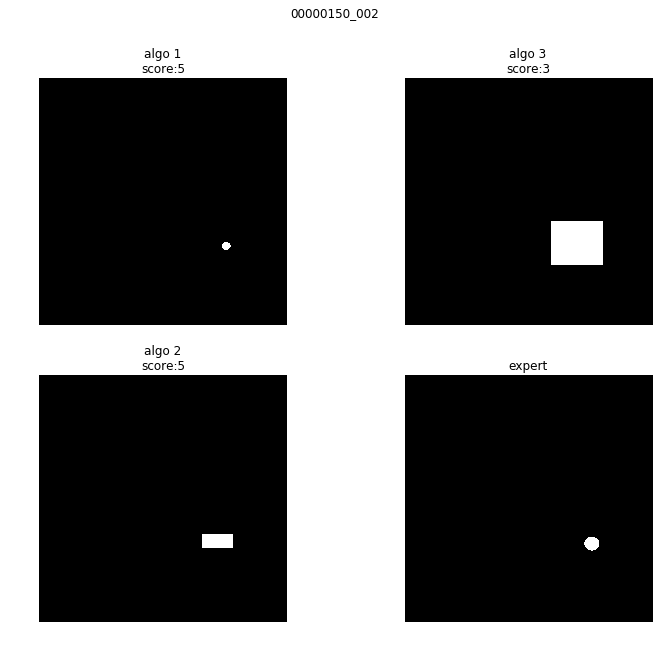

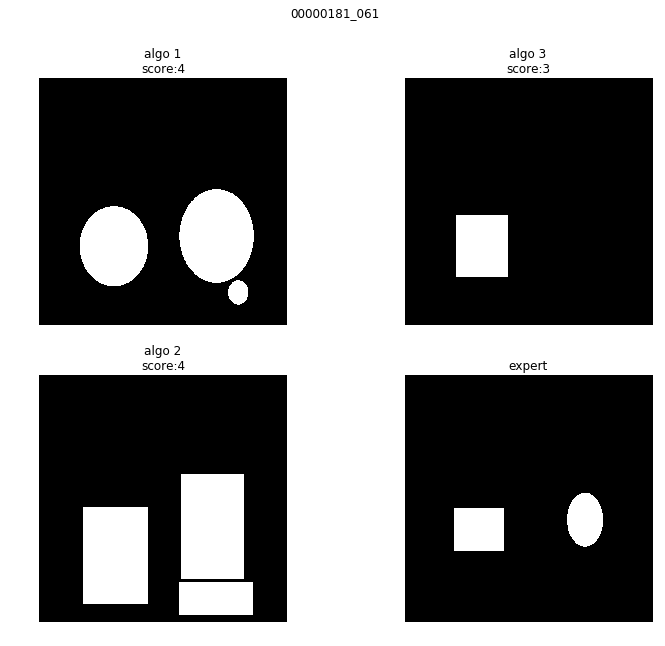

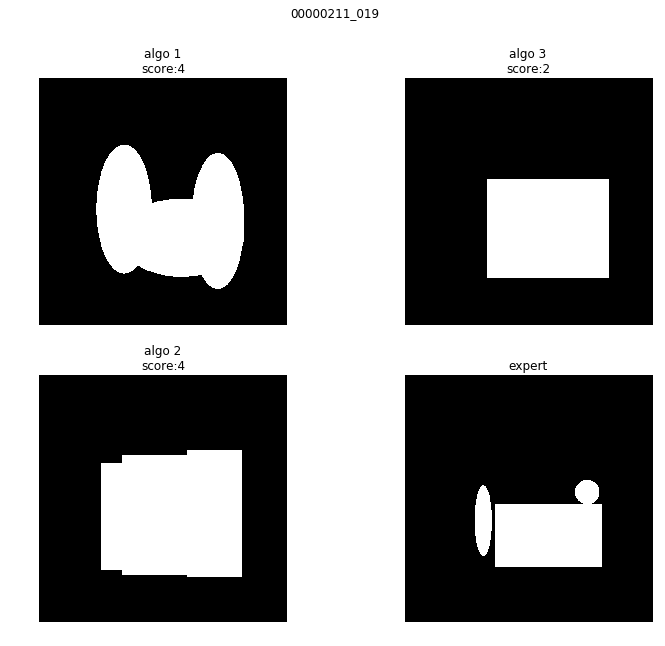

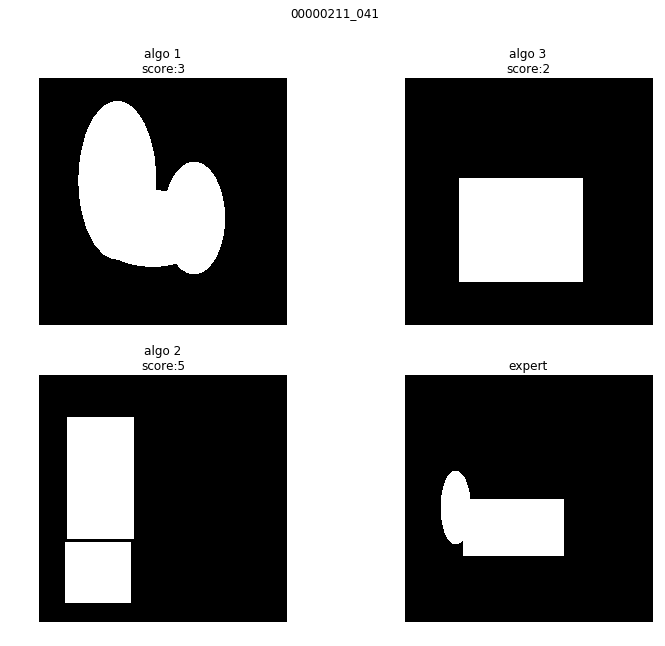

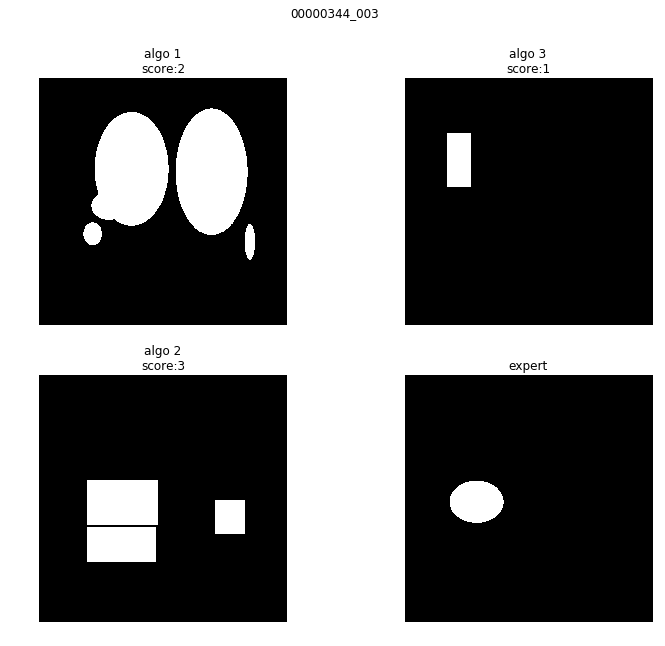

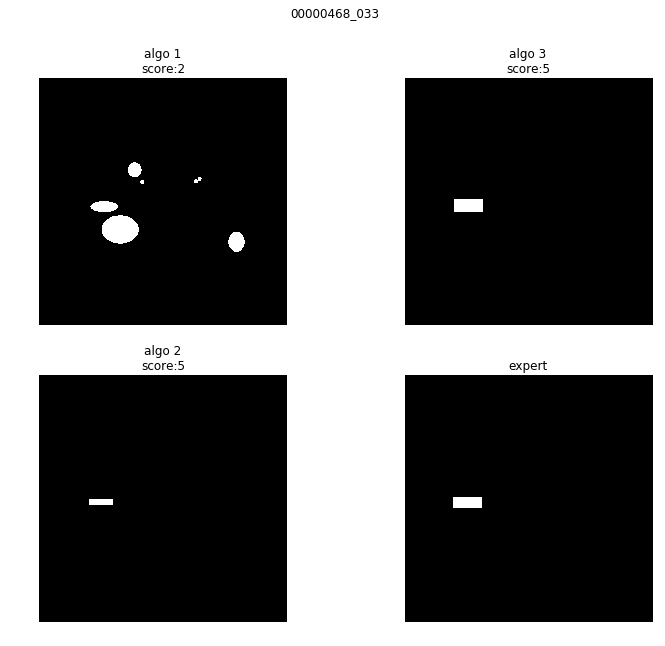

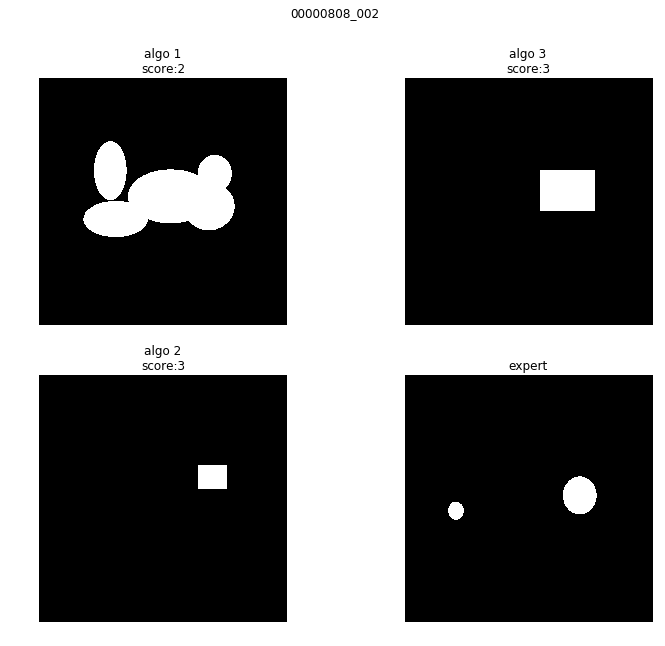

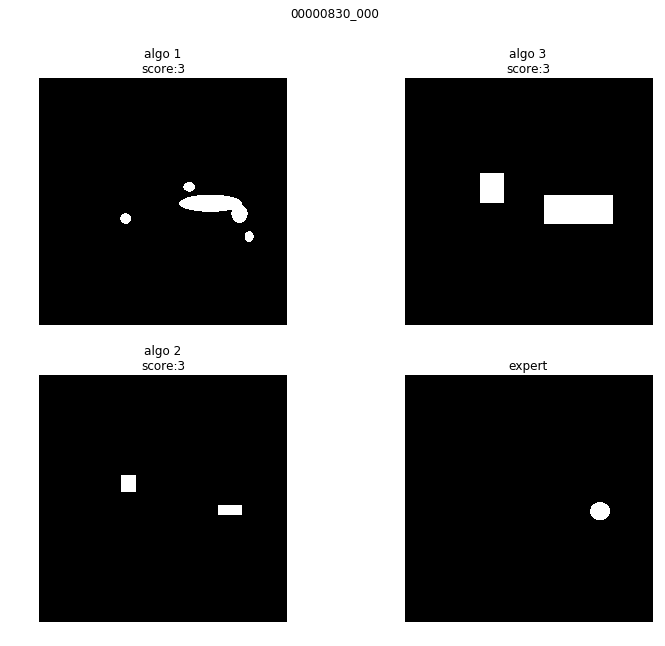

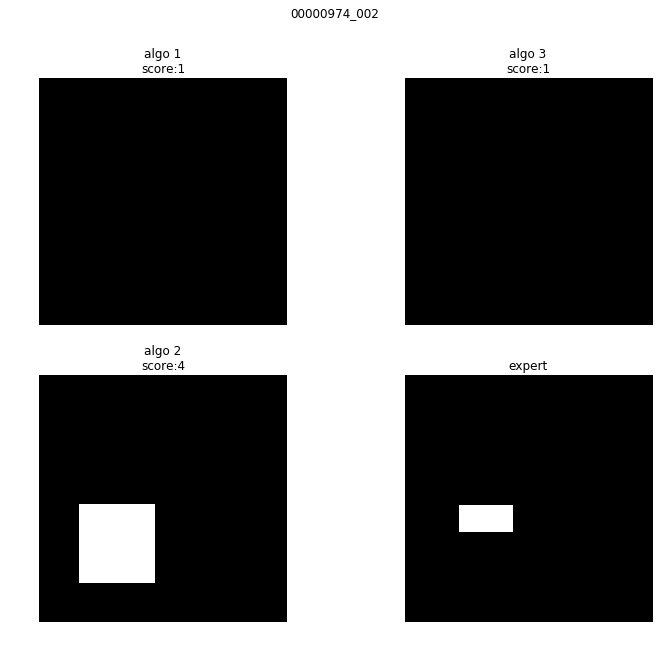

In [5]:
for img in img_ids[:10]:
    plot_img(img)

# Распределения признаков

In [9]:
data = pd.read_parquet('dataset_parquet.parquet')
data.head()

,mi,tp,hd,name,Sample,type,center_dist,vs,ari,jac,f1,obj_num_diff,feat
0,0.100797,0.080799,2758.246726,00010277_000.png,3,1,121.687337,0.840047,0.506098,0.919201,0.263547,-2,473
1,0.174395,0.026121,3324.793227,00010277_000.png,4,2,24.586807,0.896461,0.793478,0.973879,0.283736,1,303
2,0.105645,0.118490,3833.490576,00010277_000.png,4,3,148.193790,0.650414,0.416935,0.881510,0.257423,2,473
3,0.054925,0.011678,360.624458,00002583_014.png,4,1,5.520585,0.809711,0.703800,0.988322,0.122062,-1,230
4,0.024133,0.015931,1925.207781,00002583_014.png,4,2,40.781397,0.940468,0.480870,0.984069,0.096163,0,76


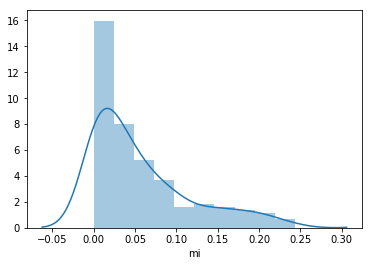

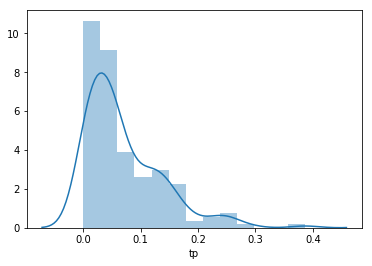

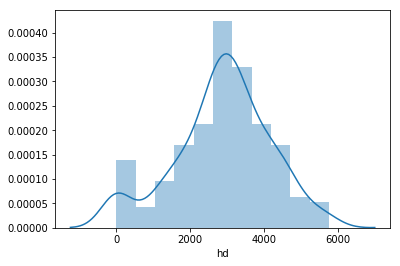

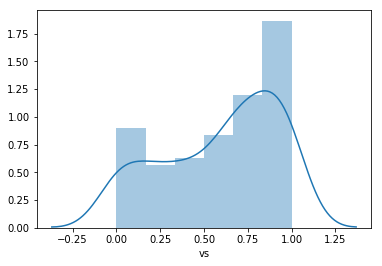

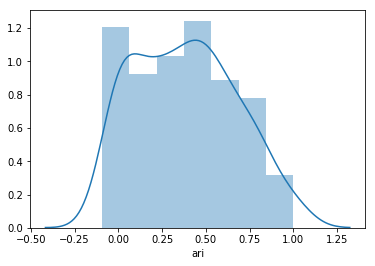

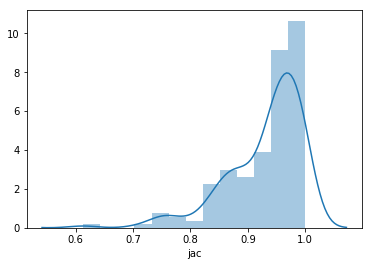

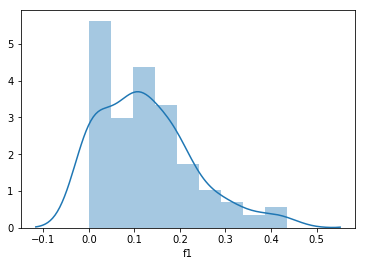

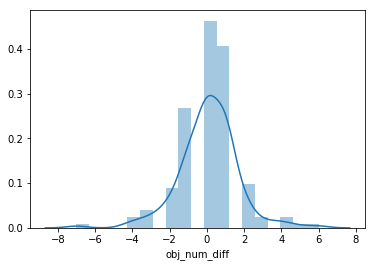

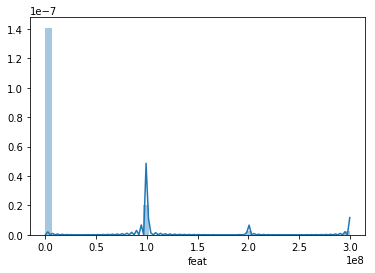

In [12]:
not_num_features = ['name', 'Sample', 'type', 'center_dist']
data_num = data.copy()
data_num.drop(not_num_features, axis=1, inplace=True)

for i, col in enumerate(data_num.columns):
    plt.figure(i)
    sns.distplot(data_num[col])